## CNN Classifier (Mask, No Mask, Incorrectly wearing Mask)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Packages

In [ ]:
# Import Libraries 
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
import sklearn
from sklearn.model_selection import train_test_split
import cv2

import seaborn as sns
import pickle
import os

### Load in the dataset that was preprocessed from local directory

In [ ]:
# Load in the files from Google Drive 

filename = '/content/drive/MyDrive/data-face-mask/Face-Mask-Dataset/X.pickle'
pickle_in = open(filename, 'rb')
X = pickle.load(pickle_in)

filename = '/content/drive/MyDrive/data-face-mask/Face-Mask-Dataset/y.pickle'
pickle_in = open(filename, 'rb')
y = pickle.load(pickle_in)

CATEGORIES = ['Without Mask', 'Incorrectly Wearing Mask', 'Wearing Mask']

In [ ]:
# double check to see the types of the loaded files
print('Type of X:', type(X))
print('Type of y:', type(y))

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


In [ ]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (17836, 64, 64)
Shape of y: (17836,)


In [ ]:
# print one example of dataset
print('X:')
print(X[13])
print('y:')
print(y[13])

X:
[[134 134 136 ...  29  31  23]
 [121 119 109 ...  25  25  22]
 [ 93  95 103 ...  33  23  21]
 ...
 [113  94 103 ...  40  41  55]
 [110  88  92 ...  44  52  67]
 [ 97  90 101 ...  49  58  70]]
y:
0


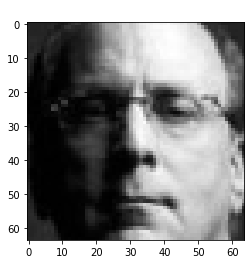

In [ ]:
# Display the one example
plt.imshow(X[10], cmap='gray')
plt.title(CATEGORIES[y[10]], color='white')
print('')

#### EDA

In [ ]:
resized_X = []
for img in X:
    resized_X.append(cv2.resize(img, (64, 64)))

In [ ]:
X = np.asarray(resized_X)
X = X.reshape(-1, 64, 64, 1)
print(X.shape)

(17836, 64, 64, 1)


In [ ]:
X = X / 255.0

In [ ]:
IMG_DIM = X.shape[1]
print('IMG_DIM:',IMG_DIM)

IMG_DIM: 64


In [ ]:
# Split dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print('Training Size:', len(X_train))
print('Testing  Size:', len(X_test))

Training Size: 14268
Testing  Size: 3568


#### Building and fitting the CNN Model 

In [ ]:
cnn_model = tensorflow.keras.models.Sequential()

In [ ]:
# Start of Convolution Layers & Maxpooling
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(IMG_DIM, IMG_DIM, 1)))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(IMG_DIM, IMG_DIM, 1)))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

# Start of Neural Nets
cnn_model.add(tensorflow.keras.layers.Flatten())

cnn_model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dropout(0.3))
cnn_model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dropout(0.3))
cnn_model.add(tensorflow.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dense(3, activation='softmax'))

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                    

In [ ]:
# Compile the Model
cnn_model.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# Train Model
epochs = 10
cnn_model.fit(X_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/10
402/402 [==============================] - 408s 1s/step - loss: 0.3303 - acc: 0.8495 - val_loss: 0.0948 - val_acc: 0.9692
Epoch 2/10
402/402 [==============================] - 406s 1s/step - loss: 0.0938 - acc: 0.9678 - val_loss: 0.0639 - val_acc: 0.9797
Epoch 3/10
402/402 [==============================] - 407s 1s/step - loss: 0.0638 - acc: 0.9777 - val_loss: 0.0514 - val_acc: 0.9804
Epoch 4/10
402/402 [==============================] - 407s 1s/step - loss: 0.0486 - acc: 0.9847 - val_loss: 0.0494 - val_acc: 0.9832
Epoch 5/10
402/402 [==============================] - 406s 1s/step - loss: 0.0452 - acc: 0.9854 - val_loss: 0.0387 - val_acc: 0.9881
Epoch 6/10
402/402 [==============================] - 406s 1s/step - loss: 0.0436 - acc: 0.9861 - val_loss: 0.0349 - val_acc: 0.9881
Epoch 7/10
402/402 [==============================] - 404s 1s/step - loss: 0.0325 - acc: 0.9895 - val_loss: 0.0588 - val_acc: 0.9881
Epoch 8/10
402/402 [==============================] - 405s 1s/step - 

#### Evalute Performance

In [ ]:
# Evaluate performance
cnn_model.evaluate(X_test, y_test)

112/112 [==============================] - 2s 14ms/step - loss: 0.0516 - acc: 0.9863


[0.051584381610155106, 0.9862667918205261]

In [ ]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=-1)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1195
           1       0.99      1.00      1.00      1184
           2       0.99      0.97      0.98      1189

    accuracy                           0.99      3568
   macro avg       0.99      0.99      0.99      3568
weighted avg       0.99      0.99      0.99      3568



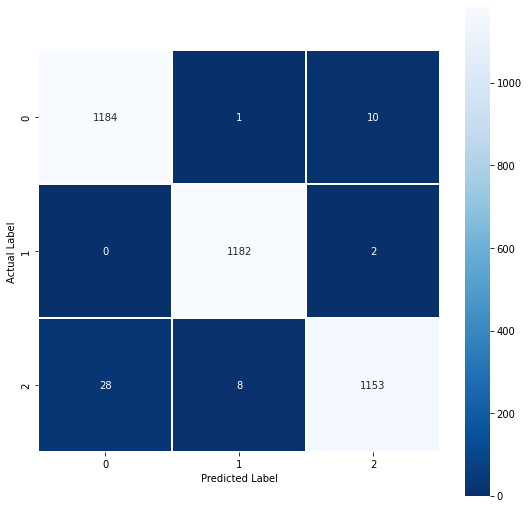

In [ ]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(sklearn.metrics.classification_report(y_test, y_pred))

#### Save model for future use

In [ ]:
path = '/content/drive/MyDrive/data-face-mask/Face-Mask-Dataset/pretrain-model/cnn'
cnn_model.save(path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data-face-mask/Face-Mask-Dataset/pretrain-model/cnn/assets


## Testing Model Bias 

Một bộ dữ liệu bên ngoài sẽ được dùng để kiểm tra và sử dụng làm dữ liệu kiểm tra cho mô hình.
- Test_bias (TB) dataset


In [ ]:
path = '/content/drive/MyDrive/data-face-mask/Face-Mask-Dataset/pretrain-model/cnn'

In [ ]:
# To load
model = tensorflow.keras.models.load_model(path)

In [ ]:
%cd /content/drive/MyDrive/data-face-mask/Face-Mask-Dataset

/content/drive/MyDrive/data-face-mask/Face-Mask-Dataset


In [ ]:
# Load TB datasets
pickle_in = open("X_test_bias.pickle", "rb")
TB_X = pickle.load(pickle_in)
pickle_in = open("y_test_bias.pickle", "rb")
TB_y = pickle.load(pickle_in)

# TB target and feature set shape
print("Features, TB_X shape: ", TB_X.shape)
print("Target, TB_y shape: ", TB_y.shape)

# Normalize the pixel values
TB_X = TB_X / 255.0

Features, TB_X shape:  (509, 64, 64)
Target, TB_y shape:  (509,)


In [ ]:
resized_X_test_bias = []
for img in TB_X:
    resized_X_test_bias.append(cv2.resize(img, (64, 64)))

In [ ]:
TB_X = np.asarray(resized_X_test_bias)
TB_X = TB_X.reshape(-1, 64, 64, 1)
print(TB_X.shape)

(509, 64, 64, 1)


In [ ]:
IMG_DIM = TB_X.shape[1]
print('IMG_DIM:',IMG_DIM)

IMG_DIM: 64


In [ ]:
y_pred_tb = np.argmax(cnn_model.predict(TB_X), axis=-1)

In [ ]:
y_pred_tb

array([1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
model.evaluate(TB_X, TB_y)

16/16 [==============================] - 0s 16ms/step - loss: 5.1059 - acc: 0.4656


[5.105922222137451, 0.4656188488006592]

              precision    recall  f1-score   support

           0       0.50      0.11      0.18       152
           1       0.26      0.12      0.17       144
           2       0.50      0.95      0.65       213

    accuracy                           0.47       509
   macro avg       0.42      0.40      0.33       509
weighted avg       0.43      0.47      0.38       509



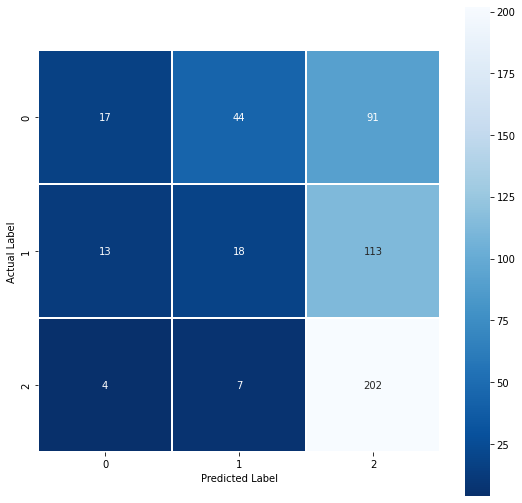

In [ ]:
cm = sklearn.metrics.confusion_matrix(TB_y, y_pred_tb)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(sklearn.metrics.classification_report(TB_y, y_pred_tb))

## DEMO


In [ ]:
%cd /content/

/content


In [ ]:
!gdown --id '1bbMNrNRyscrvxhxU0Lt7wL9A7N9MA3vZ'

Downloading...
From: https://drive.google.com/uc?id=1bbMNrNRyscrvxhxU0Lt7wL9A7N9MA3vZ
To: /content/5996.png
100% 24.4k/24.4k [00:00<00:00, 39.4MB/s]


In [ ]:
LABEL = {
    0: "Không đeo khẩu trang",
    1: "Đeo khẩu trang sai cách",
    2: "Đeo khẩu trang đúng cách"
}

In [ ]:
path_img = input()

/content/5996.png


In [ ]:
img_transform = cv2.imread(os.path.join(path_img), cv2.IMREAD_GRAYSCALE)
img_transform = cv2.resize(img_transform, (64 , 64))
img_transform = img_transform.reshape(-1, 64, 64, 1)

In [ ]:
img_transform = img_transform / 255.0 

In [ ]:
label = np.argmax(cnn_model.predict(img_transform), axis=-1)

In [ ]:
label

array([0])

In [ ]:
print("Nhan cua hinh anh vua nhap la: {}".format(LABEL[label[0]]))

Nhan cua hinh anh vua nhap la: Không đeo khẩu trang
